In [1]:
%matplotlib inline
from scipy.optimize import newton
import scipy.constants as sc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Test a trvial case

In [3]:
def two_order_poly(x):
    return x**2-2

def two_order_poly_d(x):
    return 2*x

def two_order_poly_dd(x):
    return 2

In [4]:
newton(two_order_poly,1,fprime=two_order_poly_d,fprime2=two_order_poly_dd)

1.4142135623730949

In [5]:
I01_array = (1e-20, 1e-18, 1e-17)
I02_array = (1e-13, 1e-15, 1e-15)
jsc_array = (137, 158, 154)

In [6]:
def gen_rec_iv(j01, j02, n1, n2, temperature, rshunt, voltage, jsc=0):
    current = (j01 * (np.exp(sc.e * voltage / (n1 * sc.k * temperature)) - 1)
               + j02 * (np.exp(sc.e * voltage / (n2 * sc.k * temperature)) - 1) +
               voltage / rshunt) - jsc
    return (voltage, current)

In [7]:
def gen_iv(voltage):
    j01=1e-20
    j02=1e-13
    n1=1
    n2=2
    temperature=300
    rshunt=1e20
    jsc=100
    current = (j01 * (np.exp(sc.e * voltage / (n1 * sc.k * temperature)) - 1)
               + j02 * (np.exp(sc.e * voltage / (n2 * sc.k * temperature)) - 1) +
               voltage / rshunt) - jsc
    return current

In [8]:
def gen_iv_d(voltage):
    j01=1e-20
    j02=1e-13
    n1=1
    n2=2
    temperature=300
    rshunt=1e20
    jsc=100
    current = (sc.e/(sc.k*temperature)*j01 * (np.exp(sc.e * voltage / (n1 * sc.k * temperature)) - 1)
               + sc.e/(sc.k*temperature)*j02 * (np.exp(sc.e * voltage / (n2 * sc.k * temperature)) - 1) +
               1 / rshunt)
    return current

In [9]:
def gen_iv_dd(voltage):
    j01=1e-20
    j02=1e-13
    n1=1
    n2=2
    temperature=300
    rshunt=1e20
    jsc=100
    current = ((sc.e/(sc.k*temperature))**2 *j01 * (np.exp(sc.e * voltage / (n1 * sc.k * temperature)) - 1)
               + (sc.e/(sc.k*temperature))**2 *j02 * (np.exp(sc.e * voltage / (n2 * sc.k * temperature)) - 1))
    return current

In [41]:
v=np.linspace(-1,1.5,num=100)

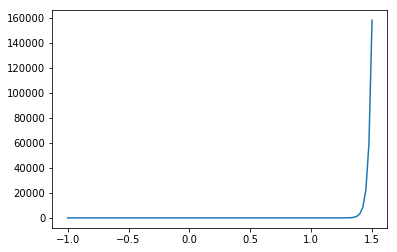

In [42]:
plt.plot(v,gen_iv(v))

In [10]:
newton(gen_iv,1.4,fprime=gen_iv_d,fprime2=gen_iv_dd)

1.3095784156090928

In [45]:
from pypvcell.fom import voc

In [46]:
voc(v,gen_iv(v))

array(1.3066141034364338)

In [47]:
min(gen_iv(v))

-100.0000000000001